<a href="https://colab.research.google.com/github/rhgurqo52/ai/blob/main/day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
######################
# 해시 탐색법
######################

# 선형 탐색이나 이진 탐색의 전제 조건은 어떤 데이터가 어떤 요소(index)에 있는지
# 전혀 모르는 상태에서 검색을 시작한다는 것이다.
# 그러나 해시 탐색법은 데이터의 '내용'과 저장한 곳의 '요소'를 미리 저장할때
# 연계를 해서 극히(***) 짧은 시간 안에 탐색할 수 있도록 고안된 알고리즘이다.

# 24 인 데이터는 첨자 24에 넣어두고 36데이터는 첨자 36에 넣어두는 것이다.
# 단지 2개의 데이터를 보관하는데 최소한 37의 요소의 배열이 필요하다.
# 낭비가 심해진다.

해시 탐색법의 특징은 나중에 데이터를 쉽게 찾도록 보관하는 단계에서 사전 준비를 해두는 것이 특징이다.

11 15 23 26

가장 알기 쉬운 방법은 데이터를 데이터의 숫자와 같은 방에 넣어두는 것이다.
하지만 메모리의 불필요한 누수가 커진다.
따라서,

먼저 병을 7개를 준비한다. index 0 - index 6

0 1 2 3 4 5 6

11 15 23 26
11 % 7(index의 수) = 4
15 % 7             = 1
23 % 7             = 2
26 % 7             = 5

0  1  2  3  4  5  6
  15 23    11 26

제대로 흩어진 상태가 되었다. 각각의 데이터를 나머지 값과 같은 번호의 방에 넣어둔다.

데이터를 넣은 방의 번호를 계산한 식은

       해시값 -> 방번호 = 데이터 % 7(방의갯수) <- 해시함수

# 해시 탐색법으로 데이터 찾는 방법

11이라는 데이터를 찾아보자. 찾을때도 저장할때 사용한 해시 함수를 다시 사용한다.
저장할때의 계산식의 '데이터 값 % 7' 이고 해시값은  4이며 인덱스 번호를 나타낸다.

따라서 해시 탐색법을 사용하면 단 한번의 계산으로 찾고자 하는 곳을 찾을 수 있다.
검색 시간을 놀라울 정도로 단축시킬 수 있다는 큰 장점이 있다.

# 해시 함수로 데이터를 보관하는 알고리즘
- 해시 함수는 데이터의 저장소 첨자를 계산한다.
- 저장소의 첨자가 겹치는 것을 '충돌' 이라고 한다.
- 충돌이 발생하면 옆의 빈 요소에 데이터를 보관한다.

1. 배열은 2개 준비한다.

- 첫번째 배열은 데이터의 갯수만큼 준비한다. (임시배열)  arrayD
0  1  2  3  4  5  6
12 25 36 20 30 8  42
- 두번째 배열은 11개를 준비하여 0으로 초기화한다. (실제저장될 배열) arrayH
0 1 2 3 4 5 6 7 8 9 10
0 0 0 0 0 0 0 0 0 0 0

arrayD 첫번째 요소부터 순차적으로 해시값을 게산하여 arrayH로 저장한다.
지금은 요소수가 11개이므로 11로 나눈 나머지를 계산하여 저장한다.

          해시값 = arrayD데이터 % 11 (해시함수)

첫 번째 arrayD[0] = 12 를 해시함수에 넣어 게산하면 해시값은 1이 된다.

0  1  2  3  4  5  6  7  8  9  10
0 12  0  0  0  0  0  0  0  0   0

이미 다른 데이터가 할당 되어 있는지 확인하여 비어 있으면 대입한다.
왜 확인이 필요하느냐는 다음에 자세히 나오지만 요소가 많으면 해시 값이
즉 나머지 값이 우연히 일치하는 경우가 많아 이미 데이터가 저장 되어 있을 가능성이 높다.

요소가 비어 있는지 확인 하려면 0이 있는지 확인하면 된다.

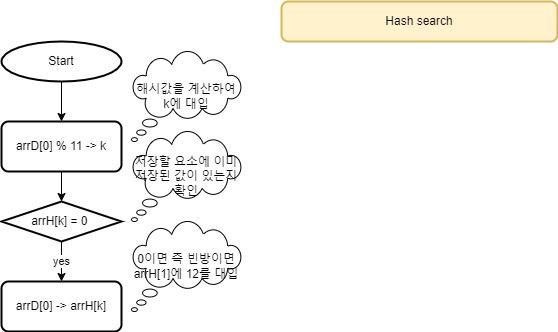

In [ ]:
arrD[0] 이후의 데이터들도 마찬가지로 같은 절차를 사용하여 데이터들을 순차적으로 arrH로 저장한다.
따라서 반복구조

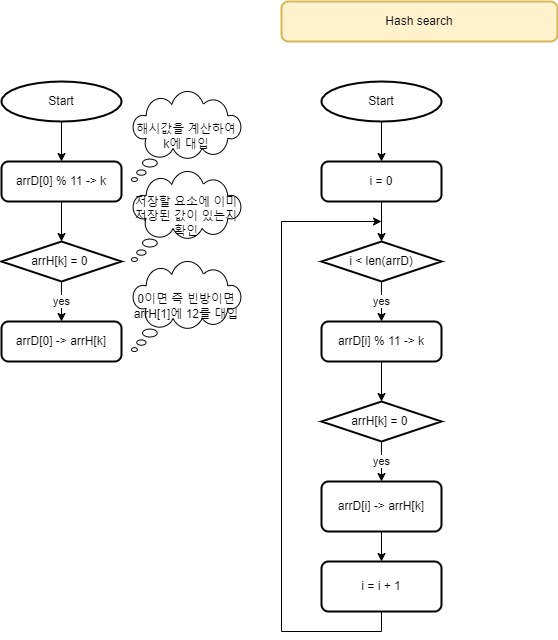

In [ ]:
종료 조건도 필요하다. i의 최대

In [ ]:
# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  0  0  0  0  0  0  0   0

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0 25  0  0  0  0  0  0   0

addD[2]의 데이터 36의 해시값은 3이다. 이미 데이터 25가 존재한다.
# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0 25  0  0  0  0  0  0   0
               --- 이미 25가 들어가 있어서 넣을 수 없다.
해시 탐색법에서는 이러한 해시값이 이미 존재하는 것을 '충돌' synonym 이라고 한다.

이러한 충돌이 발생하는 경우 즉 arrH[k] = 0 이 아닌 No 의 경우 처리를 생각해야한다.
해결책은 간단하다. 바로 옆의 요소가 비어 있으면 거기에 넣으면 된다.
arrH[k]옆의 요소는 arrH[k+1] 이다. k값을 하나 증가시켜 0인지의 여부를 확인한다.

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0 25  0  0  0  0  0  0   0

**** 충돌에 대하여....
충돌이 너무 자주 일어나면 추가적인 처리가 많이 필요하게 된다.
해시탐색법의 장점이 무색해진다.
충돌이 일어나지 않게 하려면 데이터가 많이 흩어지도록 해야한다.

요소가 많아질수록 충돌의 가능성은 적어지지만 메모리의 사용량이 늘어나
알고리즘의 효율성이 떨어지게 된다.

탐색 처리의 속도를 유지하는 것과 가능한 메모리를 적게 사용하는 요소의 수는 
일반적으로 저장 데이터 수의 1.5배에서 2배라고 알려져 있다.

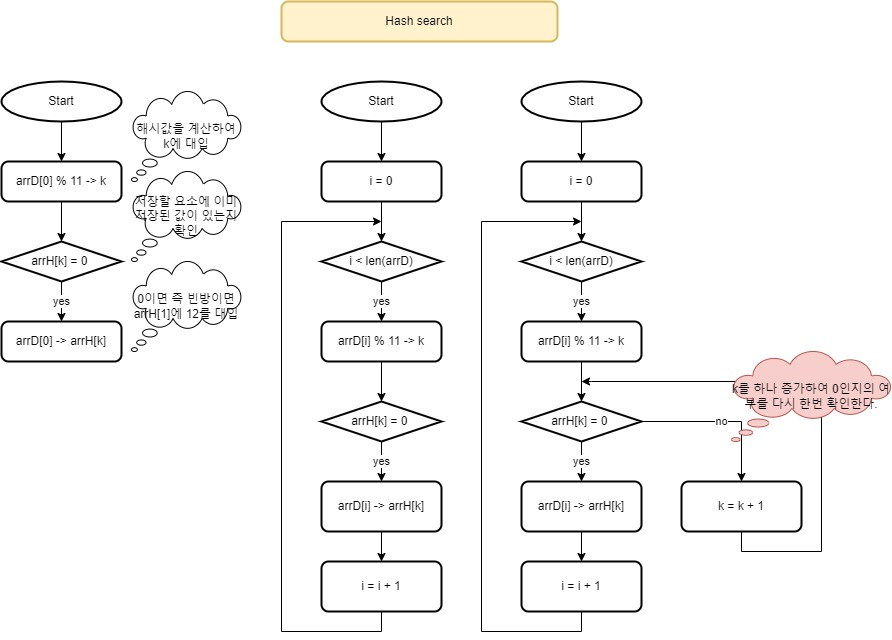

In [ ]:
# 0  1  2  3  4  5  6  
# 12 25 36 20 30 8 42
  -- -- --



# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0 25 36  0  0  0  0 20   0

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0 25 36  0  0  0 30  20  0

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0 25 36  0  0  0 30  20  0
                         --  <- 8 충돌 발생

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0 25 36  0  0  0 30  20  0
                         --  --  <- 9 충돌 발생

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0 25 36  0  0  0 30  20  8
                                 --

마지막 요소인 42는 해시값이 9다. arrH[9]에 이미 데이터가 존재하고 
arrH[10]에도 이미 데이터가 존재한다. 그리고 그 이상의 값은 없다.

좀 더 간단한 방법을 사용해 보자. k를 하나 증가시키는 처리 k + 1 -> k의
k+1을 arrH의 요소수로 나누어 그 나머지를 k에 대입하는 방법이다. 즉
(k+1) % 11 -> k를 사용한다.

k값이 0에서 10인 경우에는 11로 나눌 필요가 없지만 k값이 10을 초과하는 경우의
처리를 별도로 준비하는 것은 비효율적이다. 두 경우 모두 11로 나누는 처리를
거친 값을 대입한다. k 값이 0에서 10인 경우에는 이 과정을 거친 후에도
원래값과 같아서 문제가 없다.
k가 10넘어 11이 된다면 나머지가 0이 되서(11 % 11 = 0) 맨 앞 요소에 다시
할당할 수 있는 장소를 찾게 된다.
만약, arrH[0]에도 이미 데이터가 있다면 k 12 12 % 11 = 1이 되어 바로 옆칸을
확인하는 처리를 진행하게 된다. 언젠가는 빈칸을 발견하게 된다.



In [ ]:
마지막 데이터 42를 할당하고 i가 7이되어 반복처리를 종료하고 끝내게 된다.
이제 arrD에 있는 7개의 데이터가 모두 arrH의 요소를 

In [ ]:
##########################
# 해시 탐색법으로 데이터를 탐색하는 알고리즘
############################################

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0 25 36  0  0  0 30  20  8

찾을때도 저장할때 사용한 것과 같은 해시함수를 사용하여 위치를 산출한다.

             해시값 = 데이터값 % 11
                         12    % 11 = 1

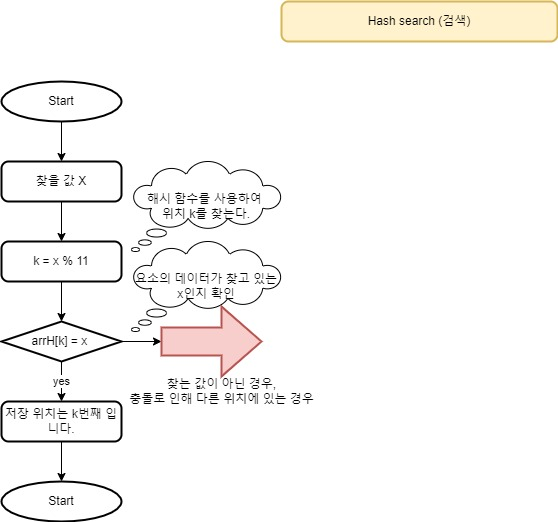

In [ ]:
# 저장할 때 충돌이 일어났던 36을 검색해 보자.
# x에 36을 입력하면 해시 값은 3을 얻게 된다.
# arrH[3] 이미 25라는 다른 데이터가 존재하고 있다.

# 0  1  2 3  4  5 6 7 8  9  10
# 42 12 0 25 36 0 0 0 30 20 8

In [ ]:
# 검색 하고 있는 데이터가 존재하지 않을 경우

# 현재는 찾는 데이터가 존재하지 않는 경우 무한 루프가 발생된다.

탬색 데이터가 발겨되지 않으면 k값을 점점 증가하다가 다시 처음부터 검색하고 이과정이 계속 반복된다.
그러면 과연 어디까지 찾아야 존재하지 않는다고 말할 수 있을까....
바로 데이터가 보관되지 않은 요소(값이 0인 요소)가 나왔을 때까지이다.

만약 데이터가 존재한다면 설사 저장할 때 충돌이 발생하여 어딘가 다른 요소에 저장되어 있다 하더라도
저장 위치를 찾을 때까지의 사이에 데이터가 0 인 요소는 절대 있을 수 없다.

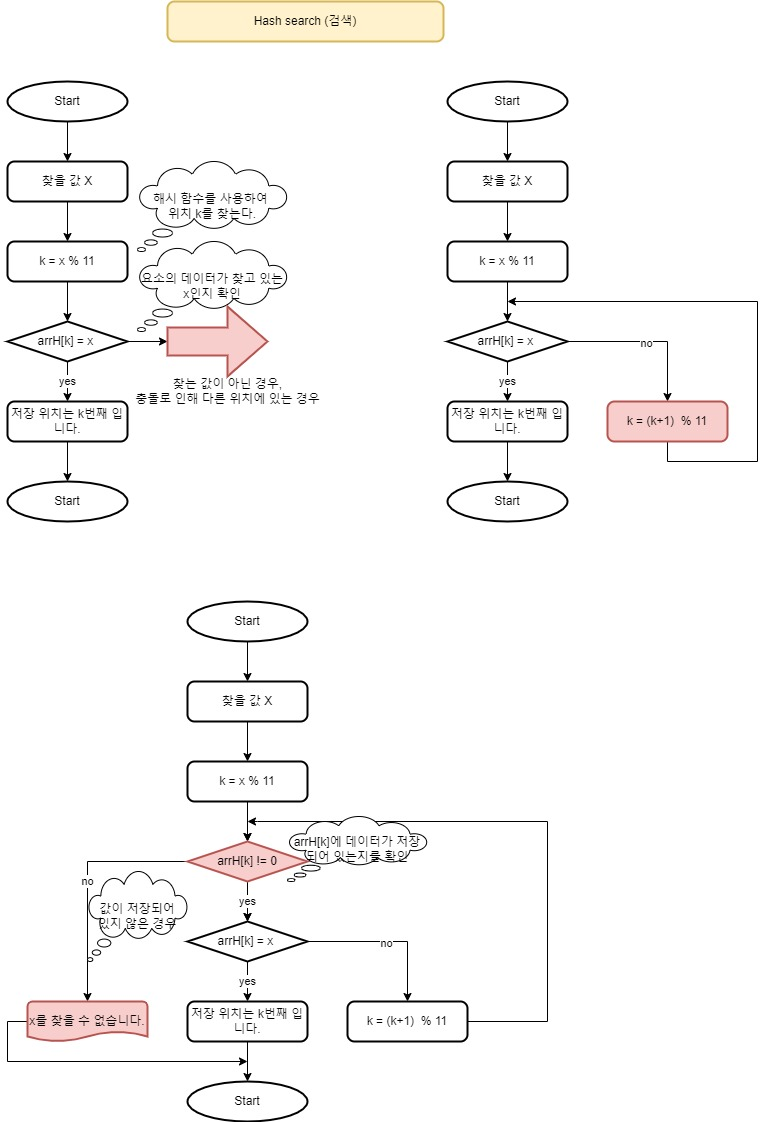

In [ ]:
###############
# 정렬 알고리즘
###############

# 데이터를 오름차순 또는 내림차순으로 나열하는 알고리즘
# 검색엔진 엑셀, 워드...이미 많이 사용하고 있다.

In [ ]:
# 단순 선택법 - 정렬되지 않은 데이터 중 가장 작은 데이터를 선택하여 맨 앞부터 순서대로
#               정렬해 나가는 알고리즘이다.

In [ ]:
0   1   2   3   4
12  13  11  14  10

12  13  11  14  10

먼저 가장 작은 숫자의 공을 첫번째 공과 교환한다.

12  13  11  14  10
--              --
10              13 11 14 12
                   --
10  11          13 14 12
                      --
10  11 12       14 13
                   --

10 11 12 13 14  <-- 정렬 끝

# 단순선택법 알고리즘

1. 탐색 범위에서 최소값을 찾는 처리
2. 탐색 범위의 맨 앞 요소와 최소값을 교환하는 처리

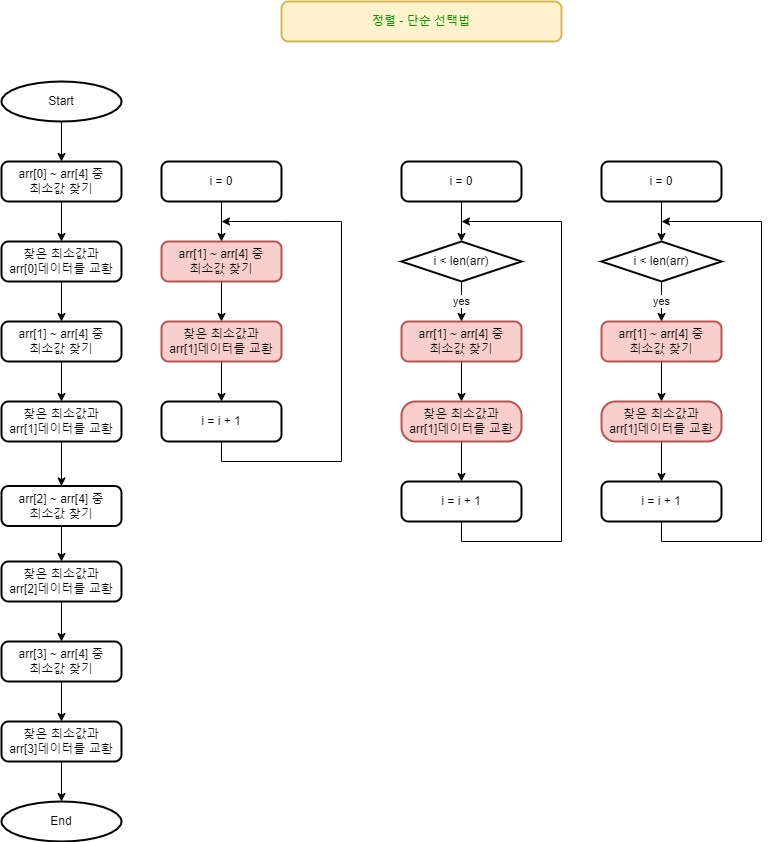

In [ ]:
# 잠정적인 최소값의 인덱스를 저장하는 변수 indexMin 을 준비한다.
# 그때그때 마다의 최소값의 첨자를 저장할 수 indexMin를 만든다.

# arr[indexMin] 와 요소들이 비교처리는 같은 절차의 반복이다. i 는 0에서 4까지 순차적으로
# 변하면서 반복된다. 이 변하는 구조의 첨자는 변수 k로 나타내 보자.
# k의 초기값은 1 최대4까지이다.

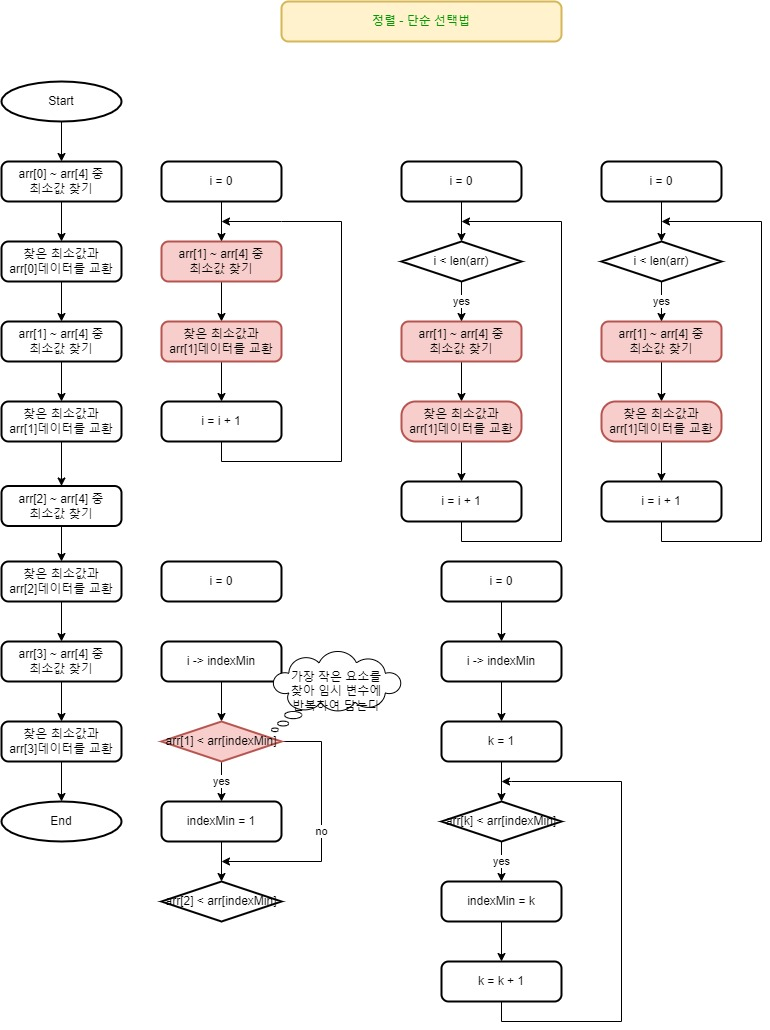

In [ ]:
# 잠정 최소값과 비교하는 요소의 첨자를 변수 k로 치환하여 반복 구조로 만들었다.
# 이대로라면 k에 무한루프가 발생된다. 반복 구조는 언제나 종료 조건이 필수이다.

# i

In [ ]:
# 최소값과 arr[i]의 대아터를 교환

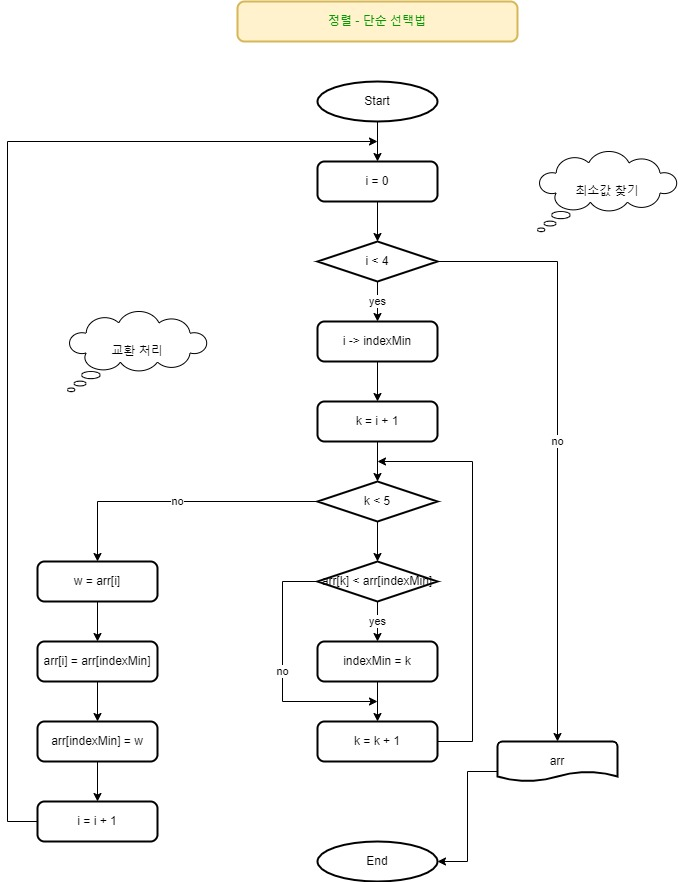

In [ ]:
###############
# 단순 교환법 Bubble Sort
###############
# 인접한 데이터를 교환하는 처리를 반복한다.

# 0  1  2  3  4 index
# 5  3  4  1  2 data


# 5  3  4  1  2   이미 정렬이 된 상태임에 따라 정렬할 필요가 없다.
         __ __

# 5  3  4  1  2  정렬이 되지 않은 상태임에 따라 교환한다.
      -- --

# 5  3  1  4  2  정렬이 되지 않은 상태임에 따라 교환한다.
   -- --

# 5  1  3  4  2  정렬이 되지 않은 상태임에 따라 교환한다.
  -- --

# 1 | 5  3  4  2  1은 정렬이 완전히 끝난 상태로 확정되었다.

# 1 | 5  3  2  4

# 1 | 5  2  3  4

# 1  2 | 5  3  4  2는 정렬이 완전히 끝난 상태로 확정되었다.

# 1  2 | 5  3  4

# 1  2   3 | 5  4  3은 정렬이 완전히 끝난 상태로 확정되었다.

# 1  2  3  4 | 5 모든 정렬이 완전히 이루어 졌다. 

In [ ]:
# 단순 교환법 Bubble Sort 알고리즘

#1. 오른쪽 끝부터 순서대로 인접한 공 2개를 오름차순 정렬한다.
#2. 왼쪽 끝 칸 부터 순서대로 들어갈 공을 확정시켜 나간다.

# 0  1  2  3  4 index
# 5  3  4  1  2 data

오른쪽 끝 인접한 공 2개
오른쪽 요소 i   arr[i]
왼쪽 요소   i-1 arr[-1]

정렬이 이미 되어있는 상태인지의 여부를 확인하려면 
    '왼쪽 요소가 오른쪽 요소보다 작은가??'
           arr[i-1] < arr[i]

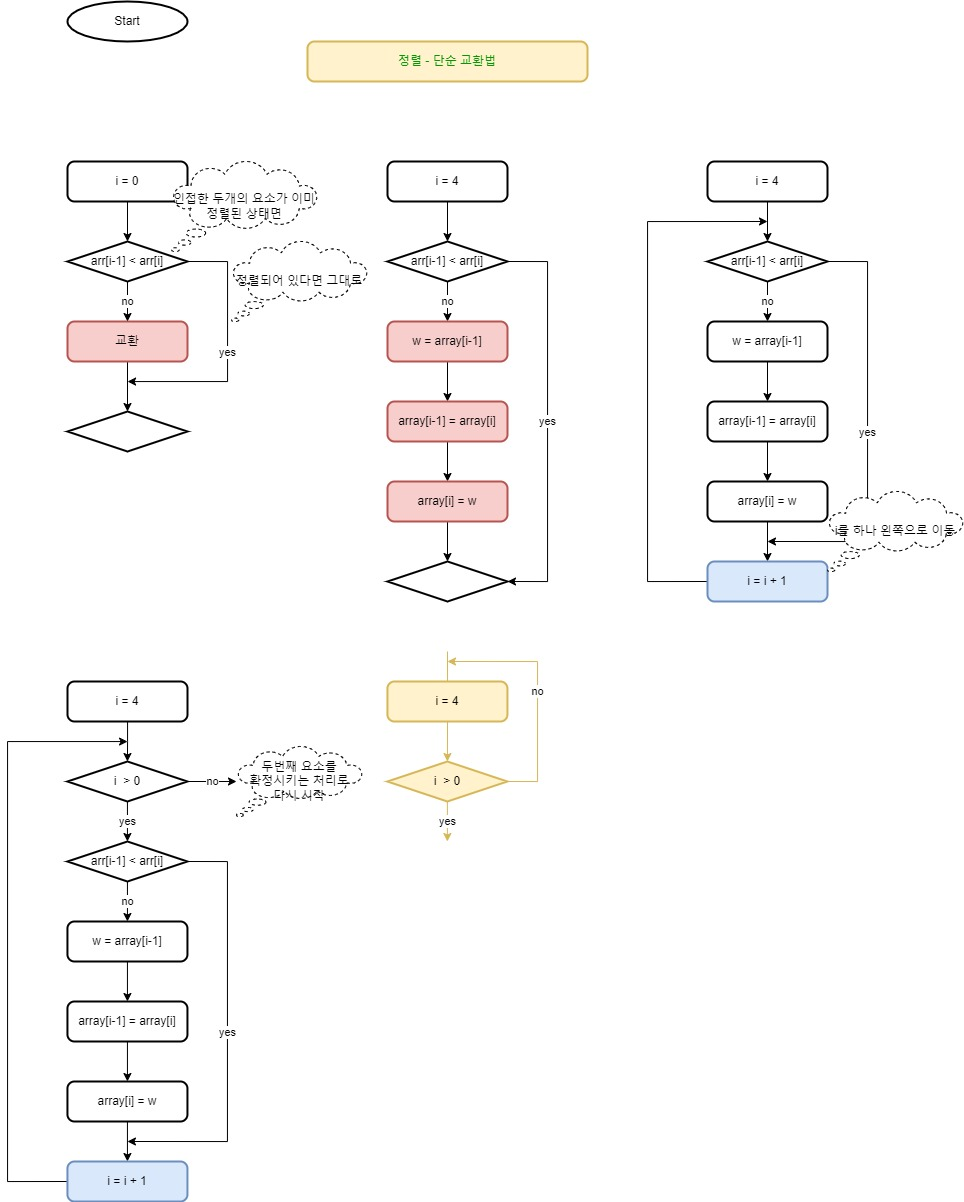

In [ ]:
# 여기까진는 순조롭게 비교와 교환처리가 진행된다.
# 마지막에는 i - 1 이 0 이 되고 i 가 1이 되면
# 이미 확정된 arr[1]을 비교하게 된다. 이것은 쓸데없는 낭비가 된다.
# 그러면 어디를 수정해야 할까....   i > 0 조건식이 문제로 보인다.
# 따라서......
# arr[1]를 확정하는 반복 처리부터는 i > 0를 i > 1 로 바꾸어야 한다.
# 반복할 때마다.i>0, i>1, i>2,     시작한다.  i>k

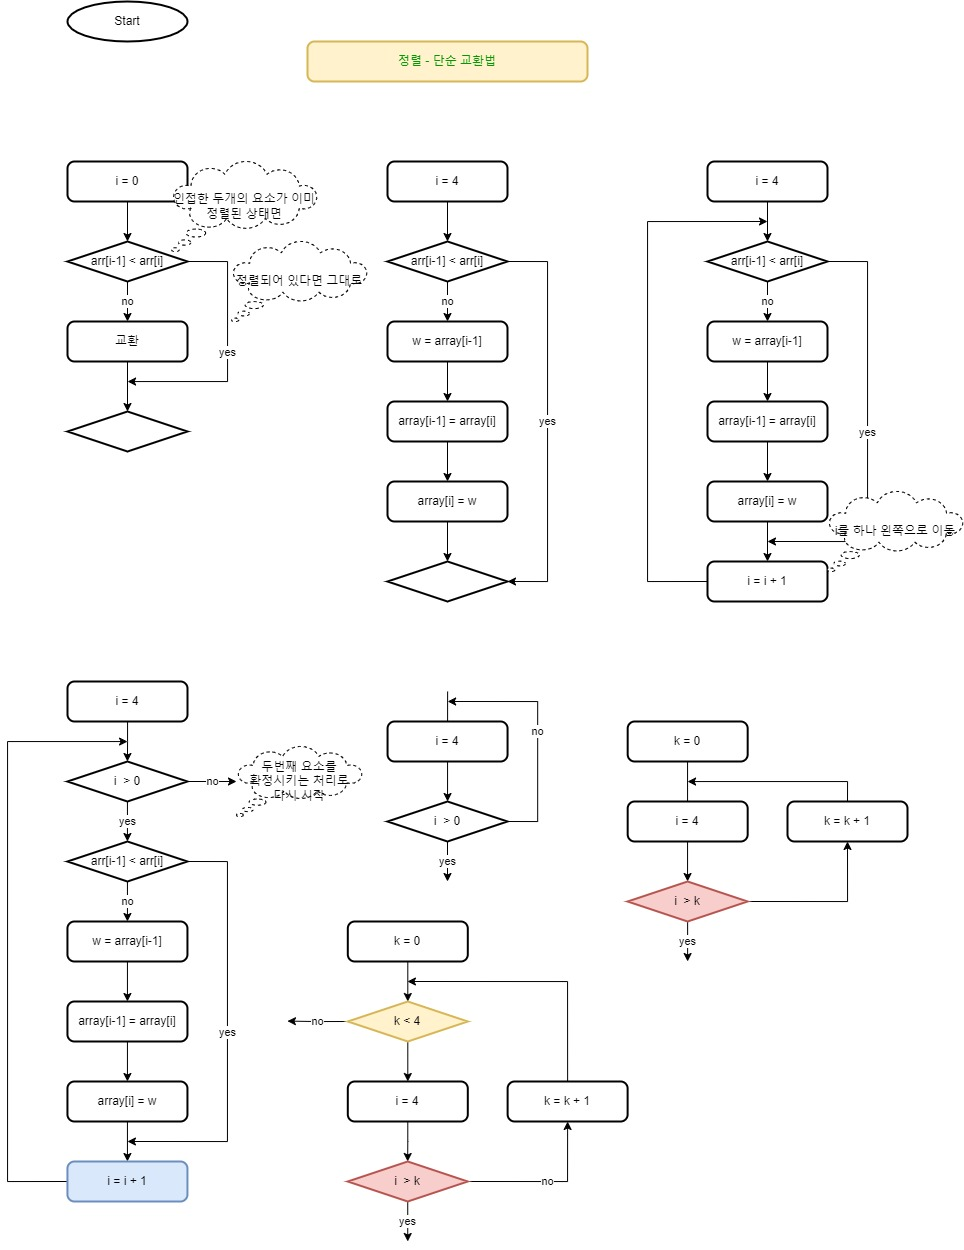

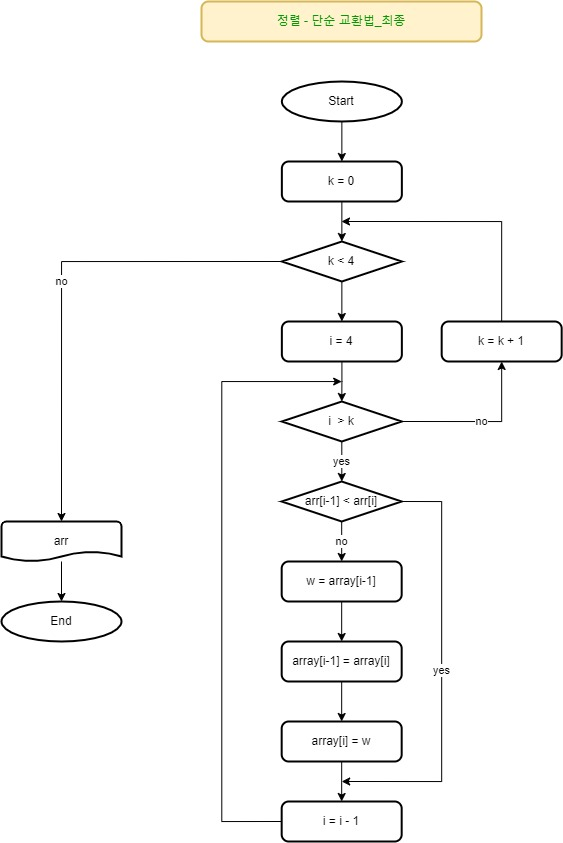